# Analysis Project: Morphological Calls vs Users

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style("whitegrid")

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Morph", "Time spent extracting cytosol", "Time spent retracting pipette", 
                "patch duration", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,n,2.3,NaN,11.78333333,18.0,pass,x
1,170104,P1,5,n,2.316666667,NaN,12.21666667,18.0,pass,x
2,170104,P1,5,n,2.45,NaN,11.78333333,18.0,pass,x
3,170104,P1,5,n,2.316666667,NaN,12.45,18.0,pass,x
4,170104,P1,5,y,2.35,NaN,12.36666667,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Changing String to Numerical
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='coerce')
ps["Time spent retracting pipette"] = pd.to_numeric(ps["Time spent retracting pipette"].str.replace(' ',''), errors ='coerce')

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["Morph"] = ps["Morph"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)
ps = ps[ps["Time spent extracting cytosol"] <= 10]

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps["Time spent retracting pipette"] = ps["Time spent retracting pipette"].fillna(0)
ps.dropna(subset = ["User", "Morph", "Time spent extracting cytosol", "Time spent retracting pipette", "patch duration", 
                    "SM_QC_PF"], inplace = True)
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,n,1.800000,0.0,4.333333,21.0,fail
1635,2017-04-19,P2,6,y,1.666667,0.0,6.566667,21.0,pass
1636,2017-04-19,P2,6,n,1.433333,0.0,8.033333,21.0,fail
1637,2017-04-19,P2,6,y,2.350000,0.0,7.416667,21.0,pass
1638,2017-04-19,P2,6,y,2.216667,0.0,4.166667,21.0,pass


## Creating Recording Duration Column

In [5]:
ps["Recording Duration"] = ps["patch duration"] - ps["Time spent extracting cytosol"] - ps["Time spent retracting pipette"]
ps = ps[ps["Recording Duration"] > 0] #Only shows postive values
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,n,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,y,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,n,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,y,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,y,2.216667,0.0,4.166667,21.0,pass,1.950000


In [6]:
ps.tail()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Recording Duration
4893,2017-12-15,PB,3,n,1.233333,0.000000,5.166667,21.0,pass,3.933333
4894,2017-12-15,P6,2,check with aaron,1.233333,2.366667,6.416667,21.0,pass,2.816667
4895,2017-12-15,P6,2,y,1.316667,2.100000,6.866667,21.0,fail,3.450000
4896,2017-12-15,P6,2,n,1.083333,2.616667,7.033333,21.0,pass,3.333333
4897,2017-12-15,P6,2,y,1.400000,1.650000,7.400000,21.0,pass,4.350000


## Renaming columns

In [7]:
#Renaming Duration Columns
ps.rename(columns = {"Time spent extracting cytosol" : "Extraction Duration", 
                     "Time spent retracting pipette" : "Retraction Duration",
                     "patch duration" : "Patch Duration"}, inplace = True)

In [8]:
#Renaming Morphological Calls
ps.Morph.cat.rename_categories({"n" : "No Fill", 
                                "y" : "Good Fill", 
                                "q" : "Questionable Fill"}, inplace = True)
ps.head()

,Date,User,Rig #,Morph,Extraction Duration,Retraction Duration,Patch Duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,No Fill,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,Good Fill,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,No Fill,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,Good Fill,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,Good Fill,2.216667,0.0,4.166667,21.0,pass,1.950000


## Info

In [9]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 1634 to 4897
Data columns (total 10 columns):
Date                   2098 non-null datetime64[ns]
User                   2098 non-null category
Rig #                  2086 non-null category
Morph                  2098 non-null category
Extraction Duration    2098 non-null float64
Retraction Duration    2098 non-null float64
Patch Duration         2098 non-null float64
PCR cycles             2098 non-null category
SM_QC_PF               2098 non-null category
Recording Duration     2098 non-null float64
dtypes: category(5), datetime64[ns](1), float64(4)
memory usage: 110.0 KB


In [10]:
ps.Morph.value_counts()

No Fill              1182
Good Fill             491
Questionable Fill     348
na                     59
processing             10
z                       4
?                       2
t                       1
check with aaron        1
                        0
Name: Morph, dtype: int64

In [11]:
ps.User.value_counts()

P2    566
P8    542
P1    488
P9    213
PB    115
P6     88
PA     81
P5      5
P3      0
P0      0
Name: User, dtype: int64

## Date for this Dataset

In [12]:
ps.head()

,Date,User,Rig #,Morph,Extraction Duration,Retraction Duration,Patch Duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,No Fill,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,Good Fill,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,No Fill,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,Good Fill,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,Good Fill,2.216667,0.0,4.166667,21.0,pass,1.950000


In [13]:
ps.tail()

,Date,User,Rig #,Morph,Extraction Duration,Retraction Duration,Patch Duration,PCR cycles,SM_QC_PF,Recording Duration
4893,2017-12-15,PB,3,No Fill,1.233333,0.000000,5.166667,21.0,pass,3.933333
4894,2017-12-15,P6,2,check with aaron,1.233333,2.366667,6.416667,21.0,pass,2.816667
4895,2017-12-15,P6,2,Good Fill,1.316667,2.100000,6.866667,21.0,fail,3.450000
4896,2017-12-15,P6,2,No Fill,1.083333,2.616667,7.033333,21.0,pass,3.333333
4897,2017-12-15,P6,2,Good Fill,1.400000,1.650000,7.400000,21.0,pass,4.350000


## Swarmplot, Violinplot & Boxplot of Patch Duration vs. Morphological Calls

In [14]:
#Data: 4/19/2017 - 12/15/2017
#Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)

## Countplot

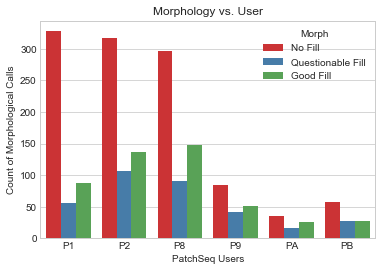

In [15]:
#Use this plot as basis for this file
cp = sns.countplot(x = "User", 
              hue = "Morph", 
              data = ps, 
              order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
              hue_order = ["No Fill", "Questionable Fill", "Good Fill"], 
              palette = "Set1").set_title("Morphology vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Count of Morphological Calls")
plt.savefig("count_vs_morph_user")

In [16]:
#Make the countplot into stacked percentage plot of morph calls by each user

## Stacked Percentage Plot

In [17]:
#def calc_pct(part,total):
#    pct = float(get_count(part)) / get_count(total)
#    return pct

In [18]:
ps2 = ps[["Date", "User", "Morph", "Rig #"]]
ps2 = ps2[(ps2["Morph"] == "No Fill") | 
         (ps2["Morph"] == "Good Fill") | 
         (ps2["Morph"] == "Questionable Fill")]
ps2.head()

,Date,User,Morph,Rig #
1634,2017-04-19,P2,No Fill,6
1635,2017-04-19,P2,Good Fill,6
1636,2017-04-19,P2,No Fill,6
1637,2017-04-19,P2,Good Fill,6
1638,2017-04-19,P2,Good Fill,6


In [19]:
ps3 = ps2[["User", "Morph", "Rig #"]]
ps3 = ps3.rename(columns={"Rig #": "Count"})
ps3.head()

,User,Morph,Count
1634,P2,No Fill,6
1635,P2,Good Fill,6
1636,P2,No Fill,6
1637,P2,Good Fill,6
1638,P2,Good Fill,6


In [20]:
ps4 = ps3.groupby(["User", "Morph"]).count()
ps4

Count
User Morph                   
P0                        NaN
     ?                    NaN
     check with aaron     NaN
     No Fill              NaN
     na                   NaN
     processing           NaN
     Questionable Fill    NaN
     t                    NaN
     Good Fill            NaN
     z                    NaN
P1                        NaN
     ?                    NaN
     check with aaron     NaN
     No Fill            328.0
     na                   NaN
     processing           NaN
     Questionable Fill   56.0
     t                    NaN
     Good Fill           88.0
     z                    NaN
P2                        NaN
     ?                    NaN
     check with aaron     NaN
     No Fill            314.0
     na                   NaN
     processing           NaN
     Questionable Fill  104.0
     t                    NaN
     Good Fill          131.0
     z                    NaN
...                       ...
P9                        NaN
     ?                    NaN
     check with aaron     NaN
     No Fill             84.0
     na                   NaN
     processing           NaN
     Questionable Fill   42.0
     t                    NaN
     Good Fill           51.0
     z                    NaN
PA                        NaN
     ?                    NaN
     check with aaron     NaN
     No Fill             36.0
     na                   NaN
     processing           NaN
     Questionable Fill   16.0
     t                    NaN
     Good Fill           26.0
     z                    NaN
PB                        NaN
     ?                    NaN
     check with aaron     NaN
     No Fill             58.0
     na                   NaN
     processing           NaN
     Questionable Fill   27.0
     t                    NaN
     Good Fill           27.0
     z                    NaN

[100 rows x 1 columns]

In [21]:
ps4 = ps4.reset_index()
ps4

,User,Morph,Count
0,P0,,NaN
1,P0,?,NaN
2,P0,check with aaron,NaN
3,P0,No Fill,NaN
4,P0,na,NaN
5,P0,processing,NaN
6,P0,Questionable Fill,NaN
7,P0,t,NaN
8,P0,Good Fill,NaN
9,P0,z,NaN


In [22]:
ps4a = ps4[['User', 'Morph', 'Count']]
ps4a

,User,Morph,Count
0,P0,,NaN
1,P0,?,NaN
2,P0,check with aaron,NaN
3,P0,No Fill,NaN
4,P0,na,NaN
5,P0,processing,NaN
6,P0,Questionable Fill,NaN
7,P0,t,NaN
8,P0,Good Fill,NaN
9,P0,z,NaN


In [23]:
ps5 = ps4a.rename(columns={'Morph': ''})
ps6 = ps5.pivot_table(values=[''], index=['User'], columns=[''], aggfunc='sum')
ps6.fillna(0, inplace = True)
ps6

Count                                                                  \
              ? check with aaron No Fill   na processing Questionable Fill   
User                                                                         
P0     0.0  0.0              0.0     0.0  0.0        0.0               0.0   
P1     0.0  0.0              0.0   328.0  0.0        0.0              56.0   
P2     0.0  0.0              0.0   314.0  0.0        0.0             104.0   
P3     0.0  0.0              0.0     0.0  0.0        0.0               0.0   
P5     0.0  0.0              0.0     1.0  0.0        0.0               2.0   
P6     0.0  0.0              0.0    61.0  0.0        0.0               8.0   
P8     0.0  0.0              0.0   296.0  0.0        0.0              90.0   
P9     0.0  0.0              0.0    84.0  0.0        0.0              42.0   
PA     0.0  0.0              0.0    36.0  0.0        0.0              16.0   
PB     0.0  0.0              0.0    58.0  0.0        0.0              27.0   

                          
        t Good Fill    z  
User                      
P0    0.0       0.0  0.0  
P1    0.0      88.0  0.0  
P2    0.0     131.0  0.0  
P3    0.0       0.0  0.0  
P5    0.0       2.0  0.0  
P6    0.0      13.0  0.0  
P8    0.0     148.0  0.0  
P9    0.0      51.0  0.0  
PA    0.0      26.0  0.0  
PB    0.0      27.0  0.0

In [24]:
#total = ps6.sum(axis=1)
#ps6["total"] = total
#ps6

In [25]:
#ps7a = ps6.drop('total', axis=1)
#ps7a